In [1]:
# フィッシャーの三原則とは
# 実験で取り上げる対象についての結果と要因を見出すための三原則のこと
# (1)反復、繰り返し：誤差による変動の評価を可能にする。偶然誤差or系統誤差の判別
# (2)ランダム化：実験による変動以外を確率的な誤差に転化する
# (3)局所管理：実験場全体での均一化が困難な場合に、局所的に均一な実験環境を準備

In [5]:
# 1元配置分散分析
# 1つの因子の異なる水準が特性値の平均にもたらす差の有無を調べる分析手法。
# 分散の分析ではなく、分散を用いた平均値の分析
# 帰無仮説H0：各水準の母平均は等しい
# 対立仮説H0：少なくとも一つの水準について母平均が異なる

import numpy as np
from scipy.stats import f

# 実験結果(繰り返し3〜5回)
Y = [
    [15, 13, 15, 16, 14],  # lev1
    [18, 17, 16, 15, 18],  # lev2
    [19, 16, 17, 18],      # lev3
    [17, 15, 16]           # lev4
]

# データ全体の平均値を求める
n_instances = 0
total = 0
for y_A in Y:
    n_instances += len(y_A)
    total += sum(y_A)
total_mean = total / n_instances
print('データの個数: {}\nデータ全体の平均値: {}'.format(n_instances, total_mean))

# 総平方和を求める
S_T = 0
for i, y_A in enumerate(Y):
    for j in range(len(y_A)):
        S_T += (Y[i][j] - total_mean)**2
print('S_T = {}'.format(S_T))

# 水準間平方和を求める
means = []
for y_A in Y:
    mean_A = sum(y_A)/len(y_A)
    means.append(mean_A)
S_A = 0
for i, mean_A in enumerate(means):
    S_A += (mean_A - total_mean)**2 * len(Y[i])
print('S_A = {}'.format(S_A))

# 誤差平方和を求める
S_E = S_T - S_A
print('S_E = {}'.format(S_E))

# 自由度を求める
phi_T = n_instances - 1
phi_A = len(Y) - 1
phi_E = phi_T - phi_A
print(phi_T, phi_A, phi_E)

# F統計量を求める
V_A = S_A / phi_A
V_E = S_E / phi_E
F = V_A / V_E
print('F = {}'.format(F))

# F分布から棄却域を決定する
f_distribution = f(phi_A, phi_E)
f_distribution.ppf(0.95) # F≥3.411のため帰無仮説は棄却。すなわち、「水準間の母平均には違いがあるといえる」と結論。


データの個数: 17
データ全体の平均値: 16.176470588235293
S_T = 40.47058823529411
S_A = 21.47058823529413
S_E = 18.99999999999998
16 3 13
F = 4.896800825593403


3.4105336446278476

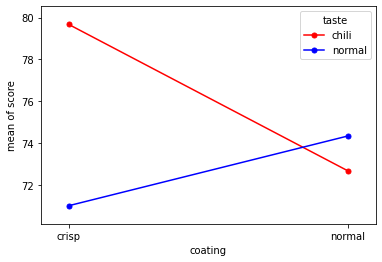

In [13]:
# 2元配置分散分析
# 2つの因子A, Bの異なる水準が特性値の平均にもたらす差の有無を調べる分析手法。
# 帰無仮説H0：Aの各水準の母平均は等しい、Bの各水準の母平均は等しい、AとBに交互作用がない
# 対立仮説H0：Aの母平均に差がある、Bの母平均に差がある、AとBに交互作用がある

# stasmodelsを活用して実行

import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.factorplots import interaction_plot

# ハンバーガーについて、「味付け」が普通/辛口の２水準、「食感」が普通/クリスピーの２水準の評価データを作成
taste = 2*(['chili' for _ in range(15)] + ['normal' for _ in range(15)])
coating = ['crisp' for _ in range(30)] + ['normal' for _ in range(30)]
hamburger_df = pd.DataFrame({'taste': taste, 'coating': coating,
'score': [65,85,75,85,75,80,90,75,85,65,75,85,80,85,90,
    65,70,80,75,70,60,65,70,85,60,65,75,70,80,75,
    70,65,85,80,75,65,75,60,85,65,75,70,65,80,75,
    70,70,85,80,65,75,65,85,80,60,70,75,70,80,85]})
hamburger_df.groupby(['coating', 'taste']).describe().round(2)

# 交互作用の確認
fig = interaction_plot(hamburger_df.coating, 
    hamburger_df.taste, 
    hamburger_df.score, 
    colors=['red', 'blue'], ms=10) # crisp * chiliの組み合わせは良い


In [14]:
# 2元配置分散分析の実行
twoway_anova = smf.ols(formula='score ~ coating + taste + coating*taste', data=hamburger_df).fit()
sm.stats.anova_lm(twoway_anova, typ=2).round(2)

# 分散分析表より
# coating（食感）による違いは有意差なし
# taste（味付け）による違いは有意差なし
# 交互作用による違いは有意差あり

,sum_sq,df,F,PR(>F)
coating,50.42,1.0,0.84,0.36
taste,183.75,1.0,3.05,0.09
coating:taste,400.42,1.0,6.65,0.01
Residual,3370.00,56.0,NaN,NaN


In [15]:
# 乱塊法とは
# 実験計画において、実験全体を無作為化せず、局所管理の考えに基づきブロック因子を導入しブロック内で無作為化を行う方法のこと。
# フィッシャーの三原則の全てを盛り込んだ実験デザイン。

In [16]:
# 一部実施要因計画とは
# 複数因子の全ての水準組み合わせではなく、その一部を実施する計画
# 直行表を活用する